In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#  Step 2: Load Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

print("Shape of dataset:", X.shape)
print("First 5 rows:\n", X.head())


Shape of dataset: (150, 4)
First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
#  Step 3: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
#  Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Step 5: Train KNN Model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
#  Step 6: Predictions & Evaluation
y_pred = knn.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



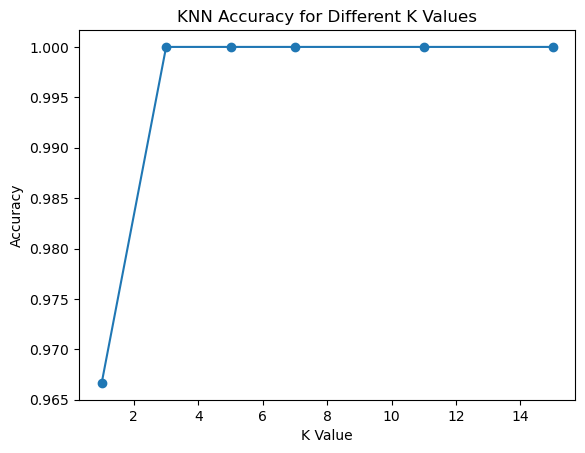

In [7]:
#  Step 7: Experiment with Different K Values

k_values = [1, 3, 5, 7, 11, 15]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.show()

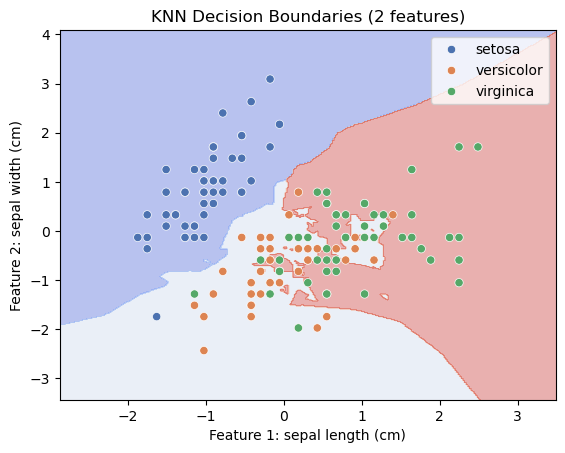

In [8]:
# Step 8: Visualize Decision Boundaries (2 features only)
# We'll use only two features for 2D visualization
X_plot = X_scaled[:, :2]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_plot, y, test_size=0.2, random_state=42)

knn_plot = KNeighborsClassifier(n_neighbors=5)
knn_plot.fit(X_train_p, y_train_p)

# Create meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_plot[:, 0], y=X_plot[:, 1], hue=iris.target_names[y], palette="deep")
plt.xlabel("Feature 1: " + iris.feature_names[0])
plt.ylabel("Feature 2: " + iris.feature_names[1])
plt.title("KNN Decision Boundaries (2 features)")
plt.show()
